# Import

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")
import plotly.express as px
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.ticker as mticker
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.impute import KNNImputer
import missingno as msno

# Load Data

In [8]:
train_df = pd.read_json('../data/train.json')
test_df = pd.read_json('../data/test.json')

#### train data : 14,271 rows x 23 columns including `price`

In [9]:
train_df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities,price
0,8448321,Bangkok,Watthana,Phra Khanong Nuea,"36 Soi Sukhumvit 63, Ekamai Road",Condo,273.0,2.0,2.0,66,...,100.584850,2,"[[E7 Ekkamai BTS, 270], [E6 Thong Lo BTS, 800]]",NaN,16.0,20,2011,June,"[Car Park, Community Garden, CCTV, Fitness cor...",8500000
1,10936325,Bangkok,Watthana,Khlong Toei Nuea,31 สุขุมวิท,Condo,74.0,1.0,1.0,49,...,100.566949,3,"[[BL22 Sukhumvit MRT, 720], [BL21 Phetchaburi ...",NaN,11.0,20,2012,September,"[CCTV, Fitness corner, 24 hours security, Swim...",5900000
2,10927931,Bangkok,Khlong Toei,Khlong Tan,"68 Sukhumvit 24 Alley, Khong Tan",Condo,940.0,1.0,1.0,34,...,100.565660,2,"[[E5 Phrom Phong BTS, 650], [BL23 Queen Siriki...",NaN,20.0,20,2017,January,"[Car Park, Clubhouse, Community Garden, CCTV, ...",6290000
3,11004792,Nonthaburi,Bang Kruai,Bang Khun Kong,Bang Khun Kong,Detached House,NaN,3.0,3.0,170,...,100.428438,0,None,NaN,2.0,4,0,None,"[Covered car park, Playground, 24 hours securi...",8900000
4,10757452,Nonthaburi,Mueang Nonthaburi,Bang Phai,พระราม5-นครอินทร์,Townhouse,NaN,3.0,2.0,120,...,100.494129,1,"[[PP09 Yaek Nonthaburi 1 MRT, 10]]",NaN,6.0,15,0,None,"[Covered car park, 24 hours security]",2390000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14266,10738911,Nonthaburi,Mueang Nonthaburi,Bang Kraso,36/2 รัตนาธิเบศร์,Condo,648.0,2.0,1.0,58,...,100.504931,2,"[[PP10 Bang Krasor MRT, 90], [PP11 Nonthaburi ...",NaN,14.0,11,2015,August,"[Covered car park, Lounge, 24 hours security, ...",4000000
14267,11031178,Nonthaburi,Bang Bua Thong,Phimon Rat,Phimonrat,Townhouse,NaN,3.0,2.0,85,...,100.359562,0,None,NaN,4.0,3,0,None,[],1790000
14268,10945909,Bangkok,Saphan Sung,Saphan Sung,Soi Ramkhamhaeng 164,Detached House,300.0,3.0,3.0,170,...,100.712196,0,None,20.0,11.0,5,0,None,"[Clubhouse, Community Garden, CCTV, 24 hours s...",4550000
14269,10768246,Bangkok,Don Mueang,Sanam Bin,วิภาวดีรังสิต,Townhouse,NaN,2.0,2.0,150,...,100.573063,0,None,NaN,10.0,8,0,None,[Covered car park],1950000


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

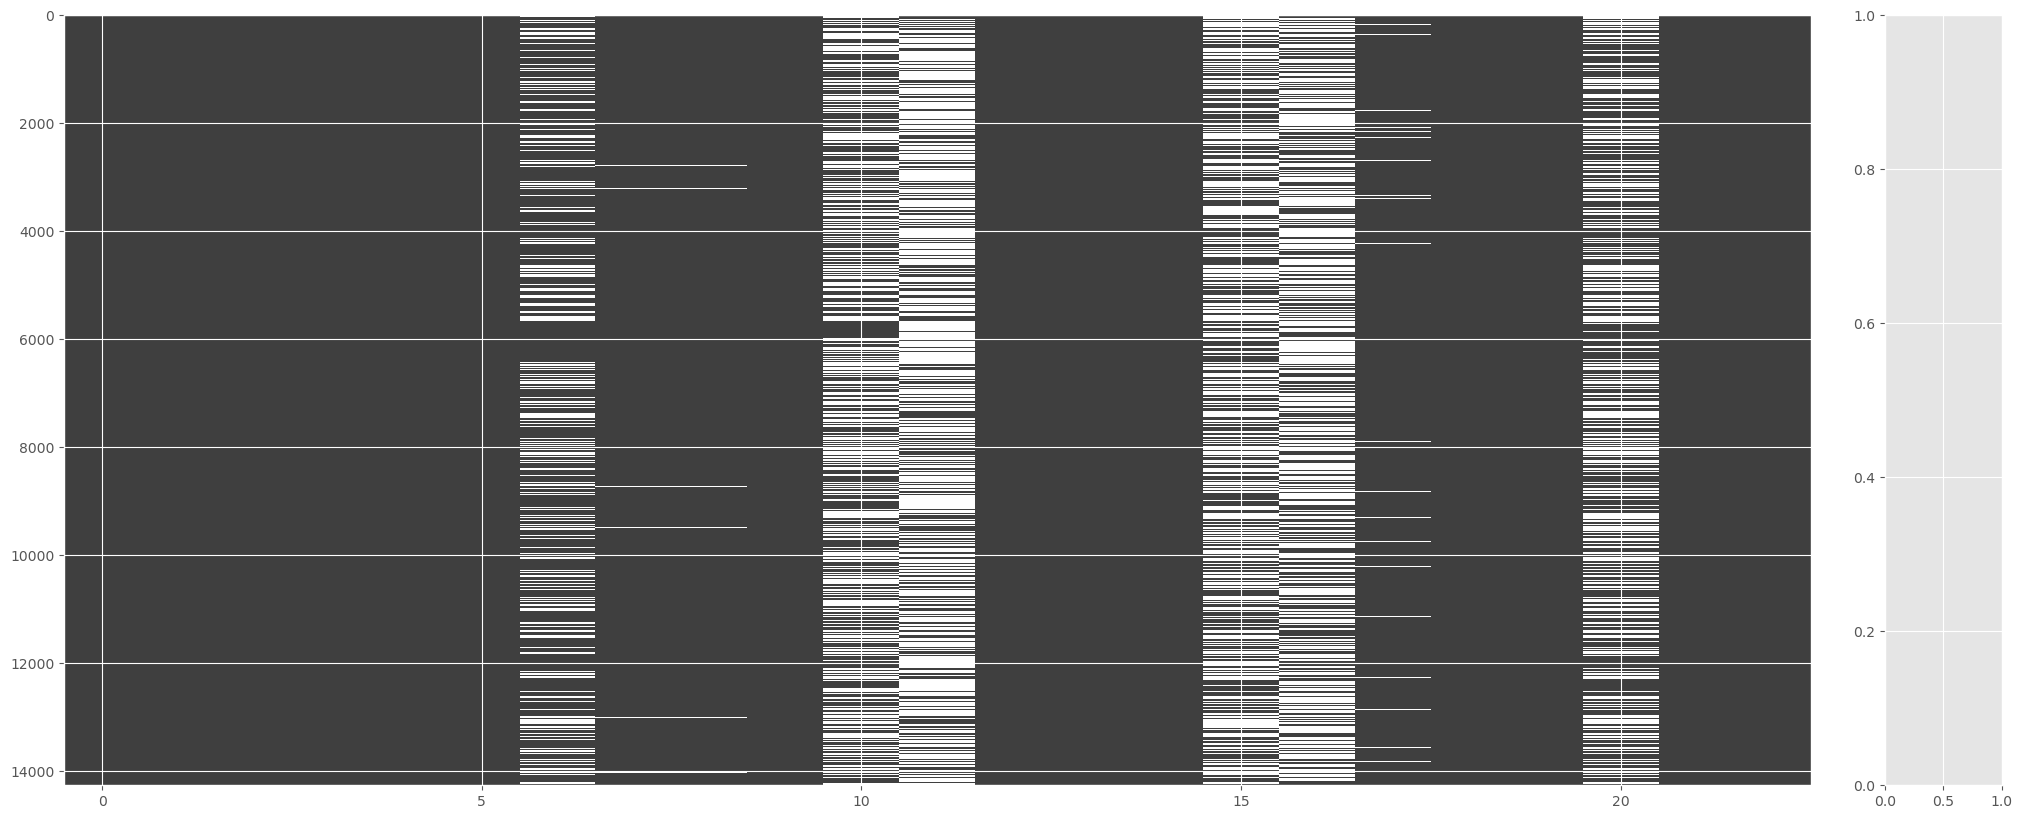

In [23]:
msno.matrix(train_df);

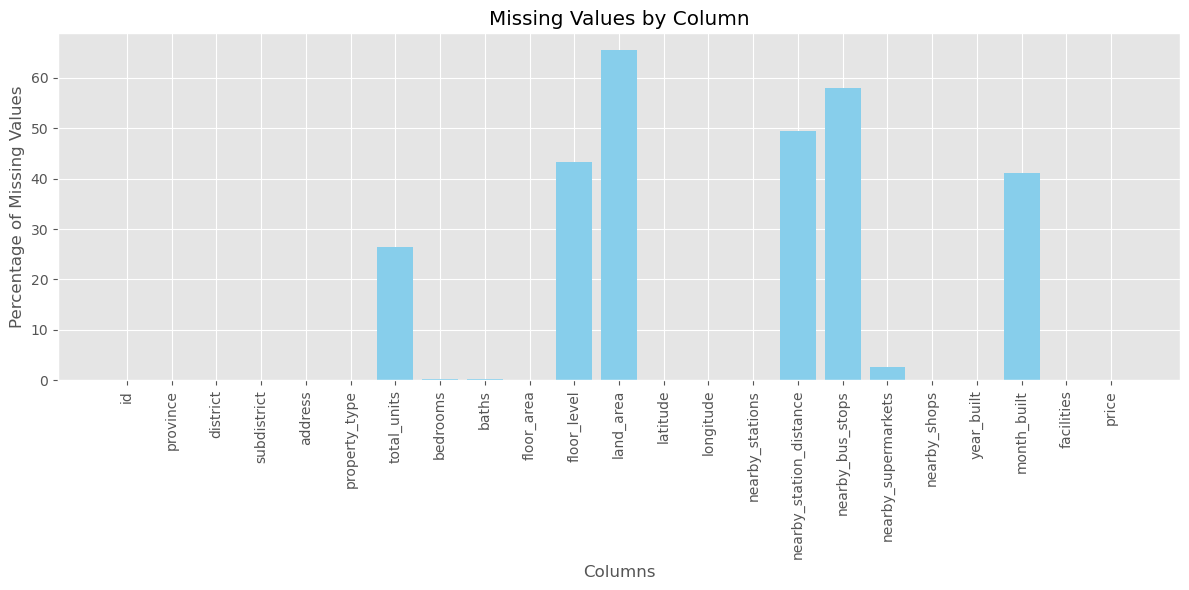

In [4]:
# Calculate the percentage of missing values in each column
missing_percentages = (train_df.isnull().mean()) * 100

# Create a bar graph to visualize missing values
plt.figure(figsize=(12, 6))
plt.bar(missing_percentages.index, missing_percentages, color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.title('Missing Values by Column')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

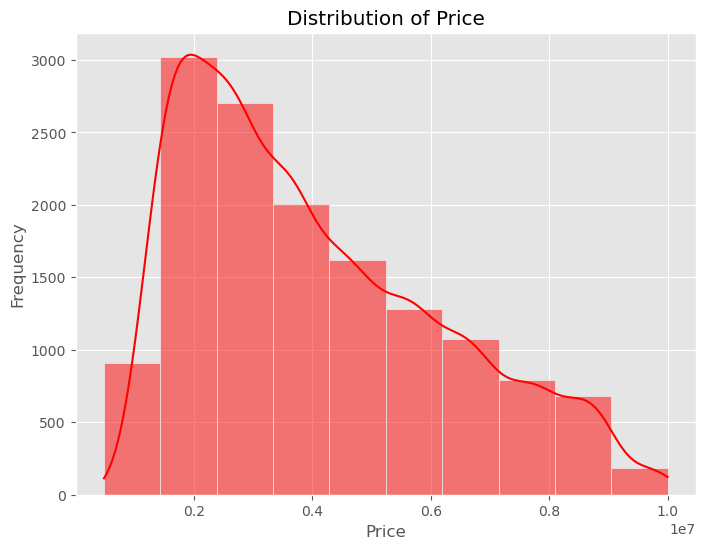

In [11]:
plt.figure(figsize=(8,6))
sns.histplot(train_df['price'], kde=True, color='red', bins=10)
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

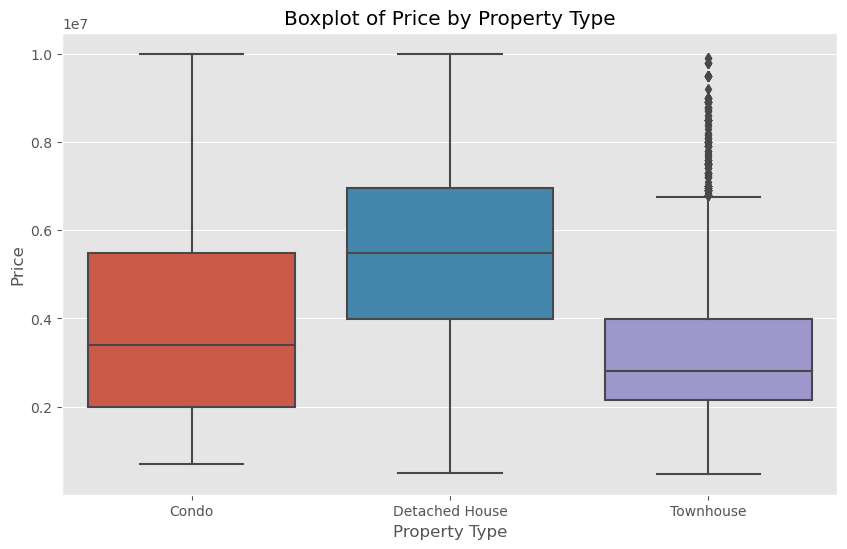

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='property_type', y='price', data=train_df)
plt.title('Boxplot of Price by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price')
plt.show()

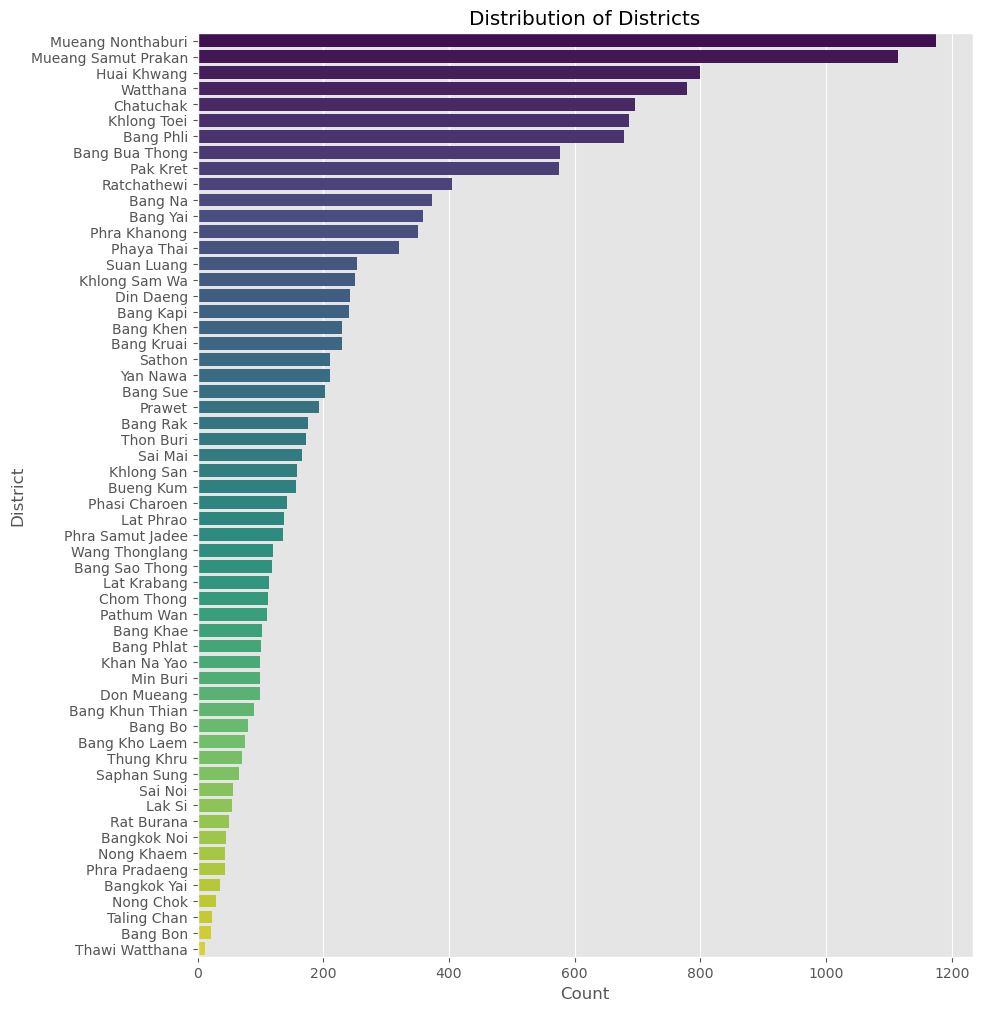

In [13]:
# Increase the size of the bars in the horizontal countplot using barplot
plt.figure(figsize=(10,12))
sns.barplot(y=train_df['district'].value_counts().index, x=train_df['district'].value_counts(), palette='viridis').set(title='hight = 1')
plt.title('Distribution of Districts')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

#### test data : 2,500 rows x 22 columns w/o `price`

# Clean up any data problems

In [14]:
missing_values = train_df.isnull().sum()

print("Missing values DataFrame :")
print(missing_values)

Missing values DataFrame :
id                            0
province                      0
district                      0
subdistrict                  11
address                       0
property_type                 0
total_units                3762
bedrooms                     43
baths                        35
floor_area                    0
floor_level                6178
land_area                  9354
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance    7043
nearby_bus_stops           8262
nearby_supermarkets         386
nearby_shops                  0
year_built                    0
month_built                5874
facilities                    0
price                         0
dtype: int64


In [15]:
# Drop rows with any null (NaN) values
train_df = train_df.dropna(subset=['subdistrict'])

In [16]:
# Define a function to remove outliers based on the IQR
def remove_outliers_iqr(data, column_name):
    Q1 = data[column_name].quantile(0.25)
    Q3 = data[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column_name] >= lower_bound) & (data[column_name] <= upper_bound)]


# Remove outliers from 'Data'
train_df = remove_outliers_iqr(train_df, 'price')


C:\Users\Chonn\AppData\Local\Temp\ipykernel_22148\3209569037.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_df.corr()


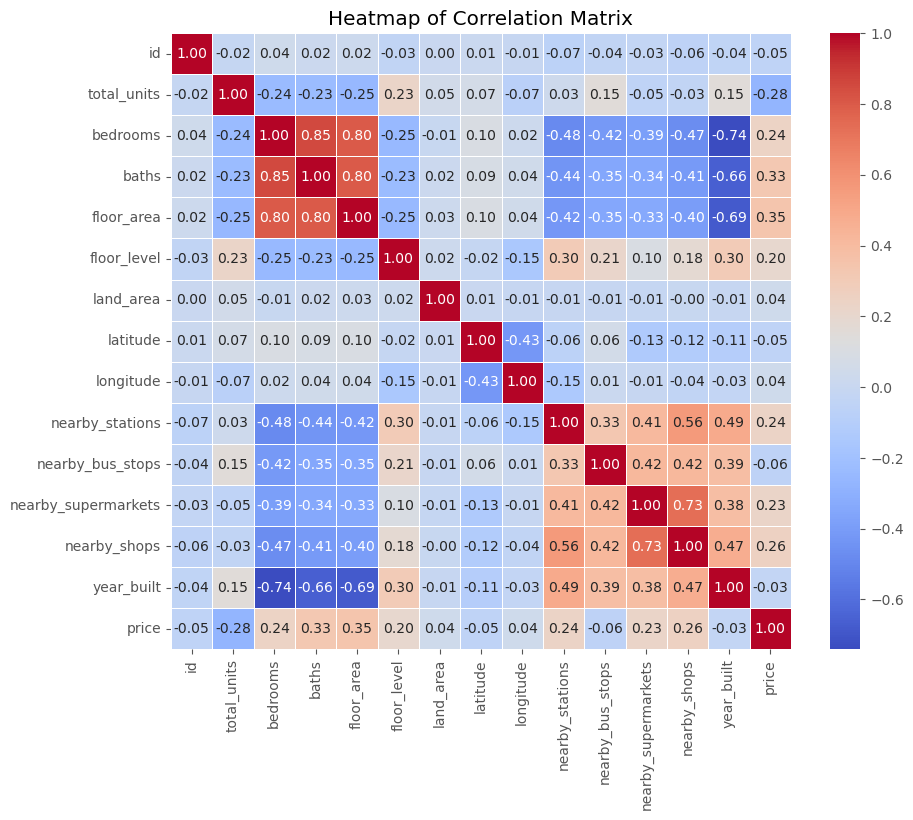

In [17]:
# Calculate the correlation matrix
correlation_matrix = train_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()

C:\Users\Chonn\AppData\Local\Temp\ipykernel_22148\2639743599.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_price = train_df.corr()['price'].sort_values(ascending=False) # Series of correlation


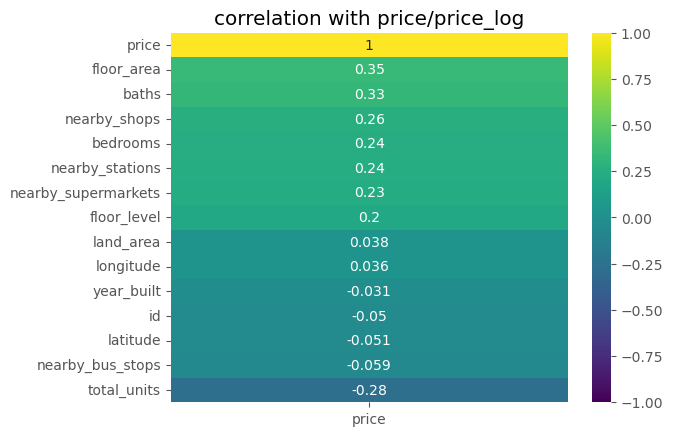

In [18]:
# take only correlations of price
corr_price = train_df.corr()['price'].sort_values(ascending=False) # Series of correlation

sns.heatmap(pd.concat([corr_price], axis=1), annot=True, vmin=-1, vmax=True, cmap='viridis')
plt.title('correlation with price/price_log');

# Modelling

#### train - dev split

In [9]:
X = pd.get_dummies(train_df[['property_type','district','province', 'subdistrict','latitude','longitude','nearby_supermarkets','bedrooms','baths', 'district', 'floor_area', 'nearby_stations', 'nearby_shops', 'year_built']], columns=['province'], drop_first=True)
X = pd.get_dummies(X,columns=['property_type'], drop_first=True)
X = pd.get_dummies(X,columns=['district'], drop_first=True)
X = pd.get_dummies(X,columns=['subdistrict'], drop_first=True)


# Separate the 'year_built' column for imputation
year_built_column = X['year_built']
features = X.drop(columns=['year_built'])

# Initialize the KNNImputer and perform imputation
imputer = KNNImputer(n_neighbors=5)
imputed_features = imputer.fit_transform(features)

# Create a new DataFrame with the imputed 'year_built' column
imputed_df = pd.DataFrame(imputed_features, columns=features.columns)
imputed_df['year_built'] = year_built_column

# Replace zero values in 'year_built' with imputed values
X['year_built'] = imputed_df['year_built'].replace(0, imputed_df['year_built'].median())


y = train_df['price']


X_test = pd.get_dummies(test_df[['property_type','district','province', 'subdistrict','latitude','longitude','nearby_supermarkets','bedrooms','baths', 'district', 'floor_area', 'nearby_stations', 'nearby_shops', 'year_built']], columns=['province'], drop_first=True)
X_test = pd.get_dummies(X_test,columns=['property_type'], drop_first=True)
X_test = pd.get_dummies(X_test,columns=['district'], drop_first=True)
X_test = pd.get_dummies(X_test,columns=['subdistrict'], drop_first=True)

X,X_test = X.align(X_test, join='left', axis=1, fill_value=0)
X = X.loc[:, ~X.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

X.fillna(0, inplace=True)

X_train, X_dev, y_train, y_dev = train_test_split(X, y, train_size=0.8, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_dev.shape)
print(y_dev.shape)

(11408, 308)
(11408,)
(2852, 308)
(2852,)


In [10]:
X.head()

,baths,bedrooms,district_Bang Bon,district_Bang Bua Thong,district_Bang Kapi,district_Bang Khae,district_Bang Khen,district_Bang Kho Laem,district_Bang Khun Thian,district_Bang Kruai,...,subdistrict_Wang Mai,subdistrict_Wang Thonglang,subdistrict_Wat Arun,subdistrict_Wat Chalo,subdistrict_Wat Phraya Krai,subdistrict_Wat Tha Phra,subdistrict_Whizdom The Exclusive,subdistrict_Wong Sawang,subdistrict_Yan Nawa,year_built
0,2.0,2.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2011.0
1,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2012.0
2,1.0,1.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2017.0
3,3.0,3.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2013.0
4,2.0,3.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2013.0


#### Dummy Regressor

In [24]:
model_dummy = DummyRegressor(strategy='mean')
model_dummy.fit(X_train, y_train)

pred_train = model_dummy.predict(X_train)
pred_dev = model_dummy.predict(X_dev)

print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))

R2 Score of train : 0.0
R2 Score of dev   : -2.157815076864189e-05

RMSE of train : 2176571.522310254
RMSE of test  : 2189860.168582723


#### Linear Regressor

In [25]:
# Step 1. Instantiate the model.
model = LinearRegression()


# Step 2. Fit the model on the training data.
model.fit(X_train, y_train)

# Step 3. Generate predictions.
pred_train = model.predict(X_train)
pred_dev = model.predict(X_dev)


print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))



R2 Score of train : 0.6587313780062172
R2 Score of dev   : -26087090204326.633

RMSE of train : 1271513.9290216558
RMSE of test  : 11184704605960.898


#### Ridge Regressor

In [26]:
# Create a Ridge regression model
ridge_model = Ridge()

# Step 2. Fit the model on the training data.
ridge_model.fit(X_train, y_train)

# Step 3. Generate predictions.
pred_train = ridge_model.predict(X_train)
pred_dev = ridge_model.predict(X_dev)


print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))


R2 Score of train : 0.6580222399936831
R2 Score of dev   : 0.6647530389794374

RMSE of train : 1272834.3125528875
RMSE of test  : 1267926.6305899438


#### Lasso Regressor

In [29]:
# Create a Lasso regression model
lasso_model = Lasso()

# Step 2. Fit the model on the training data.
lasso_model.fit(X_train, y_train)

# Step 3. Generate predictions.
pred_train = lasso_model.predict(X_train)
pred_dev = lasso_model.predict(X_dev)


print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))

R2 Score of train : 0.65873037427002
R2 Score of dev   : 0.6634358389628345

RMSE of train : 1271515.7989029386
RMSE of test  : 1270415.0583774403


C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.211e+15, tolerance: 5.404e+12
  model = cd_fast.enet_coordinate_descent(


#### ElasticNet Regressor

In [34]:
# Create a ElasticNet regression model
elastic_net_model = ElasticNet()


# Step 2. Fit the model on the training data.
elastic_net_model.fit(X_train, y_train)

# Step 3. Generate predictions.
pred_train = elastic_net_model.predict(X_train)
pred_dev = elastic_net_model.predict(X_dev)


print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))

R2 Score of train : 0.43283310565596356
R2 Score of dev   : 0.44253562113539013

RMSE of train : 1639186.539839371
RMSE of test  : 1635009.4216627532


#### Feature selection

In [35]:
# Feature selection using chi-squared test
k_best = SelectKBest(chi2, k=150)  # Select top 100 features based on chi-squared test
X_train_selected = k_best.fit_transform(X_train, y_train)
X_dev_selected = k_best.transform(X_dev)

In [36]:

elastic_net_model.fit(X_train_selected, y_train)

# Step 3. Generate predictions.
pred_train = elastic_net_model.predict(X_train_selected)
pred_dev = elastic_net_model.predict(X_dev_selected)


print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))


R2 Score of train : 0.4313317142178005
R2 Score of dev   : 0.4412066316537402

RMSE of train : 1641354.7147602816
RMSE of test  : 1636957.1845139947


In [37]:
lasso_model.fit(X_train_selected, y_train)

# Step 3. Generate predictions.
pred_train = lasso_model.predict(X_train_selected)
pred_dev = lasso_model.predict(X_dev_selected)


print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))


R2 Score of train : 0.6432302410806133
R2 Score of dev   : 0.6563765465121361

RMSE of train : 1300070.6686605883
RMSE of test  : 1283669.131514587


C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.069e+15, tolerance: 5.404e+12
  model = cd_fast.enet_coordinate_descent(


In [24]:
ridge_model.fit(X_train_selected, y_train)

# Step 3. Generate predictions.
pred_train = ridge_model.predict(X_train_selected)
pred_dev = ridge_model.predict(X_dev_selected)


print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))


R2 Score of train : 0.6428107285917506
R2 Score of dev   : 0.6564411425952443

RMSE of train : 1300834.7968338842
RMSE of test  : 1283548.4705201786


In [40]:
model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],  # Whether to fit an intercept or not
    'positive': [True, False]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)  # Negate the score since GridSearchCV minimizes by default

Best Parameters:  {'fit_intercept': False, 'positive': True}
Best Score:  1757134842270.7002


In [41]:
# Define a dictionary of hyperparameters and their possible values to search over

param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Values for the alpha parameter
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']  # Values for the solver parameter
}

# Create a Ridge regression model
ridge_model = Ridge()

# Create a GridSearchCV object
grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)  # Negate the score since GridSearchCV minimizes by default



C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best Parameters:  {'alpha': 2.0, 'solver': 'svd'}
Best Score:  1687841533632.6362


In [42]:
# Create a Ridge regression model
ridge_model = Ridge(alpha=2.0, solver='svd')

# Step 2. Fit the model on the training data.
ridge_model.fit(X_train, y_train)

# Step 3. Generate predictions.
pred_train = ridge_model.predict(X_train)
pred_dev = ridge_model.predict(X_dev)


print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))


R2 Score of train : 0.6573556792788278
R2 Score of dev   : 0.6648075378847713

RMSE of train : 1274074.171439908
RMSE of test  : 1267823.567132281


In [43]:
# Create a Lasso regression model
lasso_model = Lasso()


param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Values for the alpha parameter
    'max_iter': [100, 500, 1000]  # Values for the max_iter parameter
}

# Create a GridSearchCV object
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)  # Negate the score since GridSearchCV minimizes by default



C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.245e+15, tolerance: 4.324e+12
  model = cd_fast.enet_coordinate_descent(
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.380e+15, tolerance: 4.325e+12
  model = cd_fast.enet_coordinate_descent(
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.416e+15, toleranc

Best Parameters:  {'alpha': 2.0, 'max_iter': 100}
Best Score:  1692216808438.078


C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.221e+15, tolerance: 5.404e+12
  model = cd_fast.enet_coordinate_descent(


In [44]:
# Create a Lasso regression model
lasso_model = Lasso(alpha=2.0, max_iter=100)

# Step 2. Fit the model on the training data.
lasso_model.fit(X_train, y_train)

# Step 3. Generate predictions.
pred_train = lasso_model.predict(X_train)
pred_dev = lasso_model.predict(X_dev)


print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))


R2 Score of train : 0.658604451057883
R2 Score of dev   : 0.6640216999681262

RMSE of train : 1271750.3620965206
RMSE of test  : 1269308.8639148732


C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.221e+15, tolerance: 5.404e+12
  model = cd_fast.enet_coordinate_descent(


In [45]:
# Create a ElasticNet regression model
elastic_net_model = ElasticNet()

# Define a range of alpha values and l1_ratio values to search over
param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],  # Values for the alpha parameter
    'l1_ratio': [0.1, 0.5, 0.7, 1.0],  # Values for the l1_ratio parameter
    'max_iter': [100, 500, 1000]  # Values for the max_iter parameter
}

# Create a GridSearchCV object
grid_search = GridSearchCV(elastic_net_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", -grid_search.best_score_)  # Negate the score since GridSearchCV minimizes by default



C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.245e+15, tolerance: 4.324e+12
  model = cd_fast.enet_coordinate_descent(
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.380e+15, tolerance: 4.325e+12
  model = cd_fast.enet_coordinate_descent(
C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.416e+15, toleranc

Best Parameters:  {'alpha': 2.0, 'l1_ratio': 1.0, 'max_iter': 100}
Best Score:  1692216808438.078


C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.221e+15, tolerance: 5.404e+12
  model = cd_fast.enet_coordinate_descent(


In [46]:
#Test Submit with best hyperparameters
elastic_net_model = ElasticNet(alpha=2.0, l1_ratio=1.0,max_iter=100)

elastic_net_model.fit(X_train, y_train)

# Step 3. Generate predictions.
pred_train = elastic_net_model.predict(X_train)
pred_dev = elastic_net_model.predict(X_dev)


print("R2 Score of train :",  r2_score(y_train, pred_train))
print("R2 Score of dev   :",  r2_score(y_dev, pred_dev))
print()
print("RMSE of train :", mean_squared_error(y_train, pred_train, squared=False))
print("RMSE of test  :", mean_squared_error(y_dev, pred_dev, squared=False))


R2 Score of train : 0.658604451057883
R2 Score of dev   : 0.6640216999681262

RMSE of train : 1271750.3620965206
RMSE of test  : 1269308.8639148732


C:\Users\Chonn\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.221e+15, tolerance: 5.404e+12
  model = cd_fast.enet_coordinate_descent(


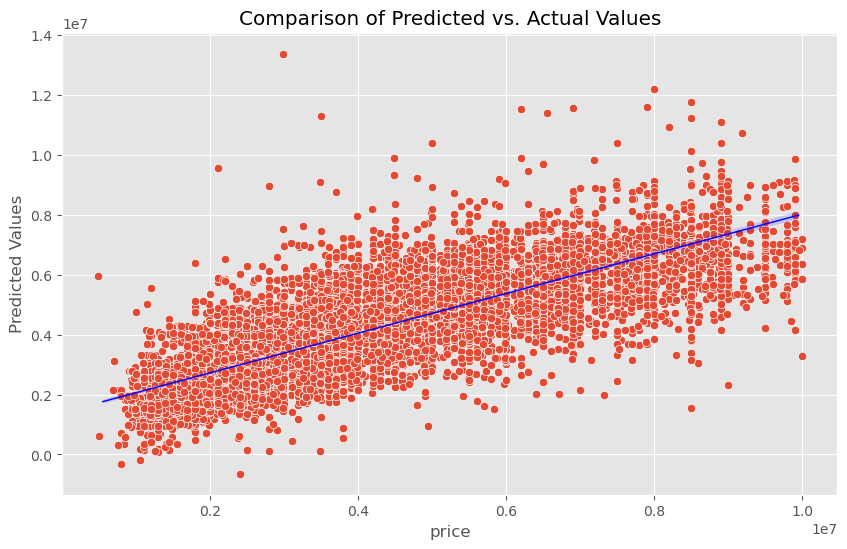

In [47]:

# Create a scatter plot comparing predictions with actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_train, y=pred_train)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Predicted vs. Actual Values')

# Plot the regression line
sns.regplot(x=y_dev, y=pred_dev, scatter=False, color='blue', line_kws={'lw': 1})

plt.show()



# How to submit

- preprocess test data in the same way as train data
- after that, predict `price` and create `submission.csv`
- `submission.csv` must have 2 columns: `id` and `price`
- **NEVER** drop any row in the test data

In [37]:
# test data has id and features, but does not have price
test_df

,id,province,district,subdistrict,address,property_type,total_units,bedrooms,baths,floor_area,...,latitude,longitude,nearby_stations,nearby_station_distance,nearby_bus_stops,nearby_supermarkets,nearby_shops,year_built,month_built,facilities
0,10317868,Samut Prakan,Bang Phli,Bang Phli Yai,Nam Daeng Road Yai,Detached House,800.0,4.0,3.0,120,...,13.614196,100.680610,0,None,NaN,9.0,5,0,None,"[Clubhouse, Community Garden, CCTV, Pavillion,..."
1,10885829,Bangkok,Nong Khaem,Nong Khang Phlu,Machareon Road,Detached House,107.0,4.0,3.0,188,...,13.702222,100.341833,0,None,20.0,9.0,5,2020,None,"[Car Park, Clubhouse, Community Garden, CCTV, ..."
2,10765951,Bangkok,Huai Khwang,Huai Khwang,72 Rama 9,Condo,433.0,1.0,1.0,22,...,13.755713,100.566385,3,"[[BL20 Phra Ram 9 MRT, 270], [E4 Asok BTS, 780...",NaN,13.0,20,2015,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
3,10003549,Bangkok,Khlong Toei,Khlong Tan,"772 Sukhumvit Road, Khong Tan",Condo,656.0,1.0,1.0,41,...,13.724295,100.577202,1,"[[E6 Thong Lo BTS, 70]]",20.0,16.0,20,2013,June,"[Car Park, Covered car park, CCTV, Fitness cor..."
4,10663026,Bangkok,Lak Si,Thung Song Hong,222 Ngamwongwan Road,Condo,1458.0,1.0,1.0,29,...,13.855437,100.547923,0,None,20.0,10.0,14,2012,September,"[Covered car park, CCTV, Fitness corner, 24 ho..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,10889363,Bangkok,Bang Rak,Maha Phruettharam,660-662 Rama 4 Road,Condo,1598.0,1.0,1.0,33,...,13.733237,100.526269,2,"[[BL27 Sam Yan MRT, 410], [S2 Sala Daeng BTS, ...",NaN,18.0,20,2016,September,"[Amphitheatre, Covered car park, Community Gar..."
2496,10975839,Bangkok,Sathon,Thung Maha Mek,88 Narathiwatratchanakharin Road,Condo,493.0,1.0,1.0,65,...,13.719377,100.531092,3,"[[B1 Sathorn BRT, 180], [B2 Arkan Songkhro BRT...",20.0,20.0,20,2009,July,"[Covered car park, CCTV, Fitness corner, Sauna..."
2497,10986832,Bangkok,Bang Phlat,Bang Yi Khan,"1521 Soi Arun Amarin 53, Arun Amarin Road",Condo,1121.0,1.0,1.0,42,...,13.772913,100.492732,1,"[[BL05 Bang Yi Khan MRT, 910]]",NaN,5.0,7,2009,January,"[Car Park, Community Garden, CCTV, Fitness cor..."
2498,10687627,Samut Prakan,Mueang Samut Prakan,Samrong Nuea,Thang Rotfai Sai Kao Road,Condo,719.0,1.0,1.0,28,...,13.653037,100.592954,1,"[[E15 Samrong BTS, 800]]",19.0,13.0,20,2016,December,"[Covered car park, CCTV, Fitness corner, 24 ho..."


In [38]:
# Check data types
print("Current data types:")
print(test_df.dtypes)

Current data types:
id                           int64
province                    object
district                    object
subdistrict                 object
address                     object
property_type               object
total_units                float64
bedrooms                   float64
baths                      float64
floor_area                   int64
floor_level                float64
land_area                  float64
latitude                   float64
longitude                  float64
nearby_stations              int64
nearby_station_distance     object
nearby_bus_stops           float64
nearby_supermarkets        float64
nearby_shops                 int64
year_built                   int64
month_built                 object
facilities                  object
dtype: object


In [39]:
missing_values = test_df.isnull().sum()

print("Missing values DataFrame :")
print(missing_values)

Missing values DataFrame :
id                            0
province                      0
district                      0
subdistrict                   3
address                       0
property_type                 0
total_units                 642
bedrooms                     10
baths                        10
floor_area                    0
floor_level                1099
land_area                  1659
latitude                      0
longitude                     0
nearby_stations               0
nearby_station_distance    1222
nearby_bus_stops           1474
nearby_supermarkets          86
nearby_shops                  0
year_built                    0
month_built                1002
facilities                    0
dtype: int64


In [40]:
X_test.fillna(0, inplace=True)

In [41]:
# prediction
pred_test = elastic_net_model.predict(X_test)
pred_test[:10]
print(pred_test.shape)

(2500,)


In [42]:
# save as csv file
test_df['price'] = pred_test
test_df[['id','price']].to_csv('submission.csv', index=False)

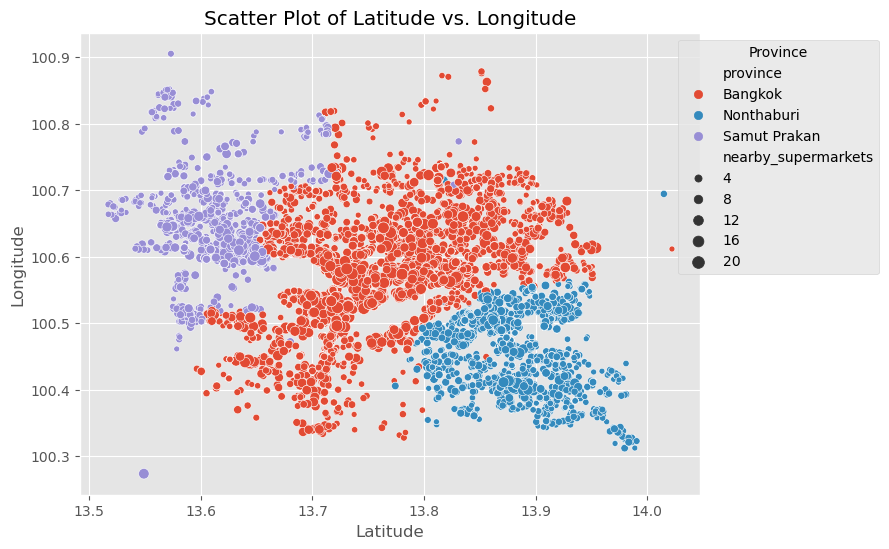

In [43]:
# Create a scatter plot of latitude vs. longitude

plt.figure(figsize=(8, 6))
sns.scatterplot(x='latitude', y='longitude', data=train_df, hue='province', size='nearby_supermarkets')

# Set plot labels and title
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Scatter Plot of Latitude vs. Longitude')

# Show the plot
plt.legend(title='Province', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

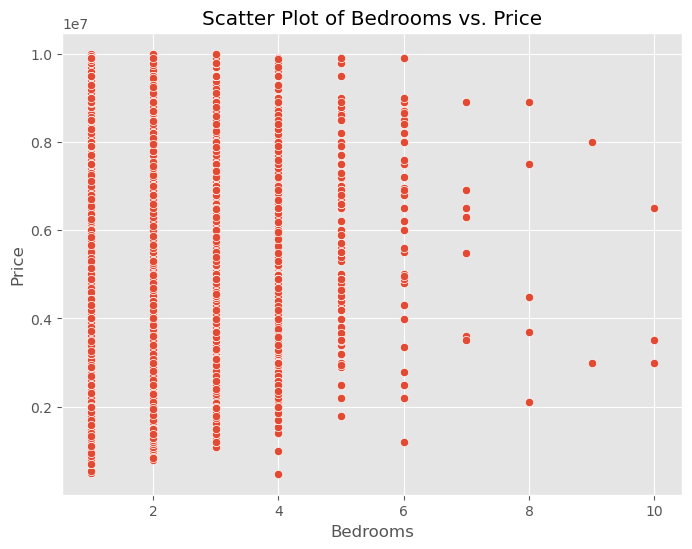

In [44]:
# Create a scatter plot of 'bedrooms' vs. 'price'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bedrooms', y='price', data=train_df)

# Set plot labels and title
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.title('Scatter Plot of Bedrooms vs. Price')

# Show the plot
plt.show()

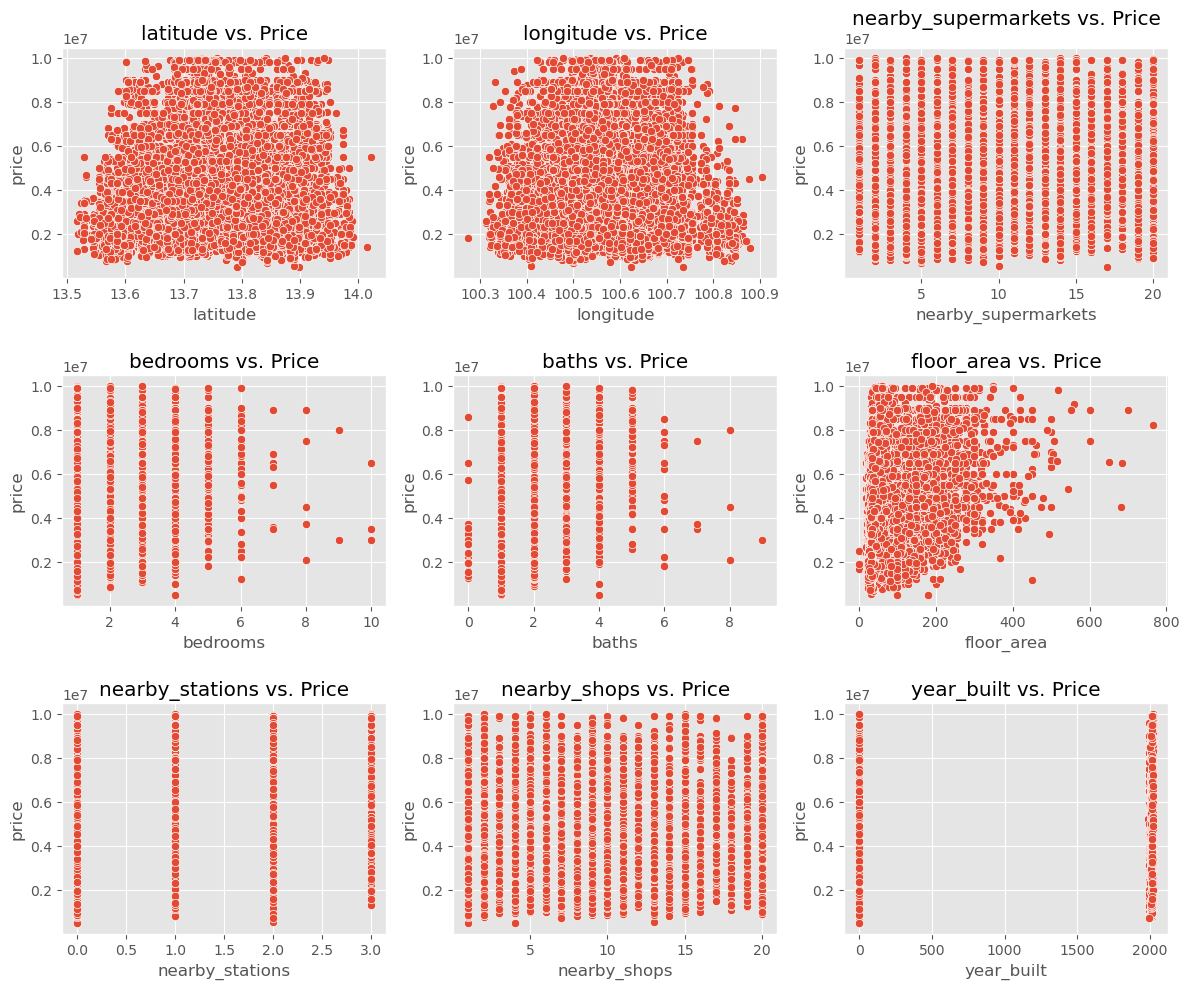

In [45]:
# Create scatter plots to visualize relationships with 'price'
plt.figure(figsize=(12, 10))
features = ['latitude', 'longitude', 'nearby_supermarkets', 'bedrooms', 'baths', 'floor_area', 'nearby_stations', 'nearby_shops', 'year_built']
for feature in features:
    plt.subplot(3, 3, features.index(feature) + 1)
    sns.scatterplot(x=feature, y='price', data=train_df)
    plt.title(f'{feature} vs. Price')

plt.tight_layout()
plt.show()

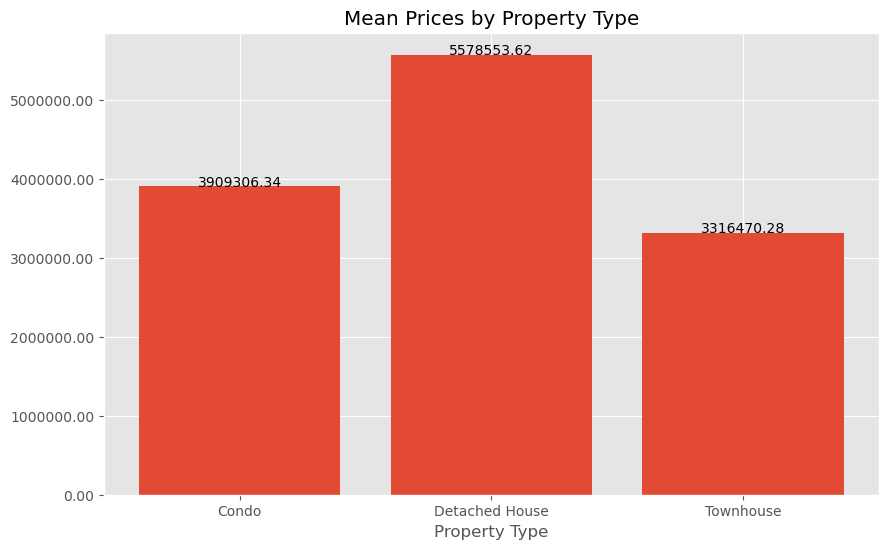

In [46]:
# Calculate the mean price for each property type
mean_prices = train_df.groupby('property_type')['price'].mean().reset_index()

# Create a bar chart to show property_type and mean price
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(mean_prices['property_type'], mean_prices['price'])

# Set plot labels and title
plt.xlabel('Property Type')
plt.title('Mean Prices by Property Type')

# Add mean price values as text on top of the bars with numeric format
for bar, mean_price in zip(bars, mean_prices['price']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5000, f'{mean_price:.2f}', ha='center')

# Set numeric format for the y-axis label
ax.get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x:.2f}'))

# Show the plot
plt.show()

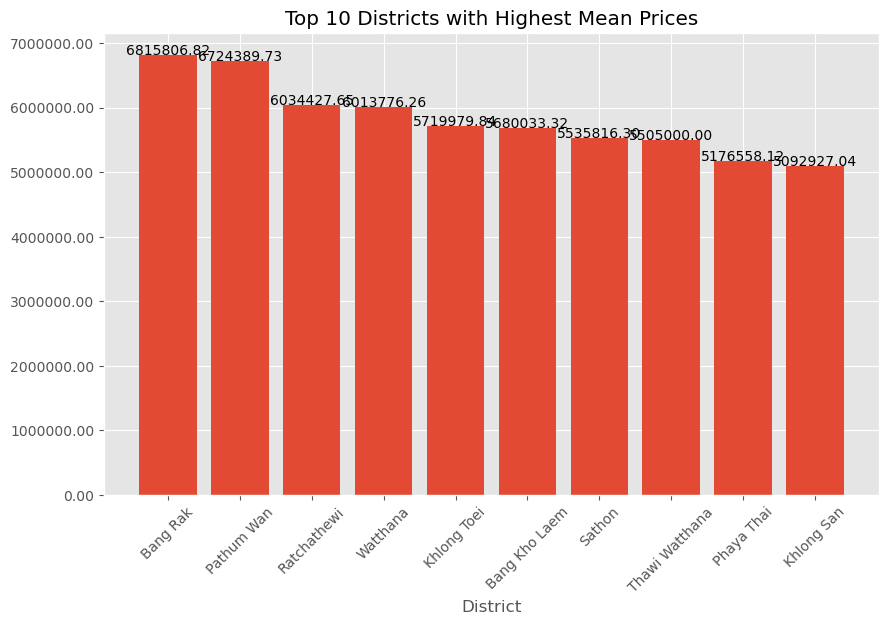

In [47]:
# Calculate the mean price for each district
mean_prices = train_df.groupby('district')['price'].mean().reset_index()

# Select the top 10 districts with the highest mean prices
top_10_mean_prices = mean_prices.nlargest(10, 'price')

# Create a bar chart to show the top 10 districts with high mean prices
fig, ax = plt.subplots(figsize=(10, 6))
bars = plt.bar(top_10_mean_prices['district'], top_10_mean_prices['price'])

# Set plot labels and title
plt.xlabel('District')
plt.title('Top 10 Districts with Highest Mean Prices')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add mean price values as text on top of the bars with numeric format
for bar, mean_price in zip(bars, top_10_mean_prices['price']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5000, f'{mean_price:.2f}', ha='center')

# Set numeric format for the y-axis label
ax.get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x:.2f}'))

# Show the plot
plt.show()

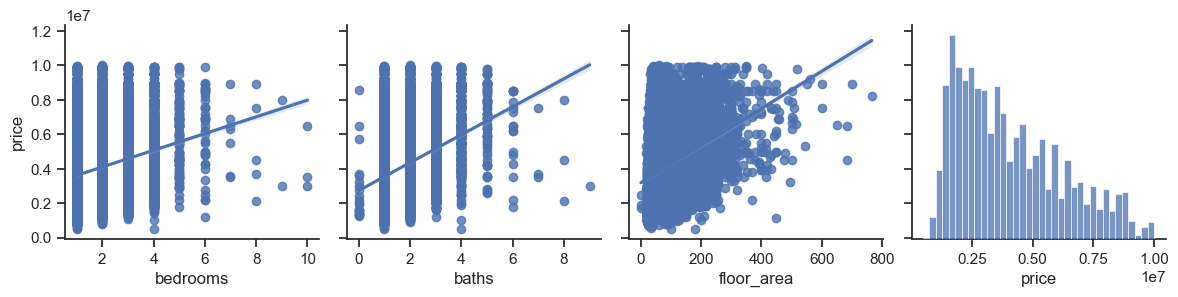

In [48]:
# Select the numeric features and the target variable 'price'
numeric_features = [ 'bedrooms', 'baths',
                    'floor_area', 'price']

# Create pair plots (scatter plots with regression lines) for the numeric features against 'price'
sns.set(style="ticks")
sns.pairplot(train_df[numeric_features], y_vars='price', kind='reg', height=3)
plt.show()

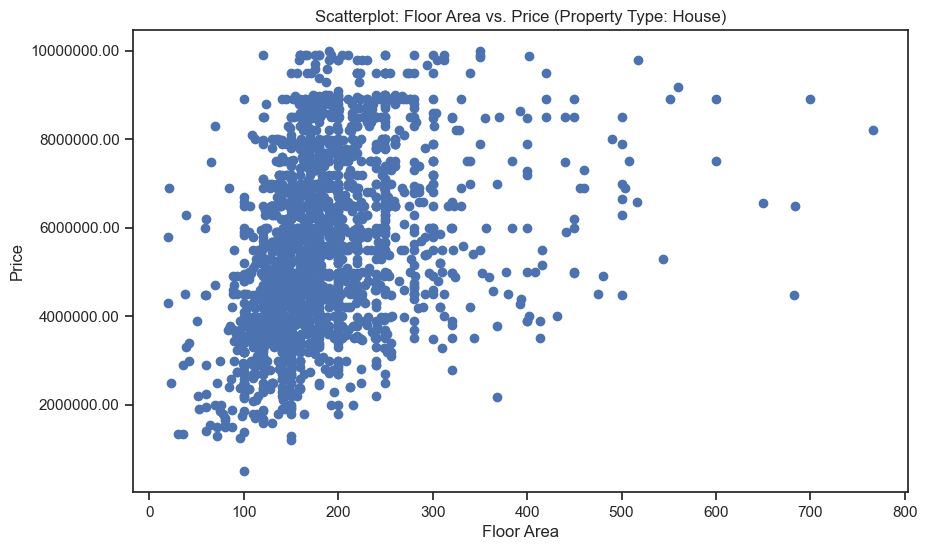

In [49]:
# Filter the DataFrame for property_type = 'Detached House'
house_df = train_df[train_df['property_type'] == 'Detached House']

# Create a scatterplot for 'floor_area' vs. 'price'
plt.figure(figsize=(10, 6))
plt.scatter(house_df['floor_area'], house_df['price'])

# Set plot labels and title
plt.xlabel('Floor Area')
plt.ylabel('Price')
plt.title('Scatterplot: Floor Area vs. Price (Property Type: House)')

# Set numeric format for the y-axis label
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{x:.2f}'))

# Show the plot
plt.show()

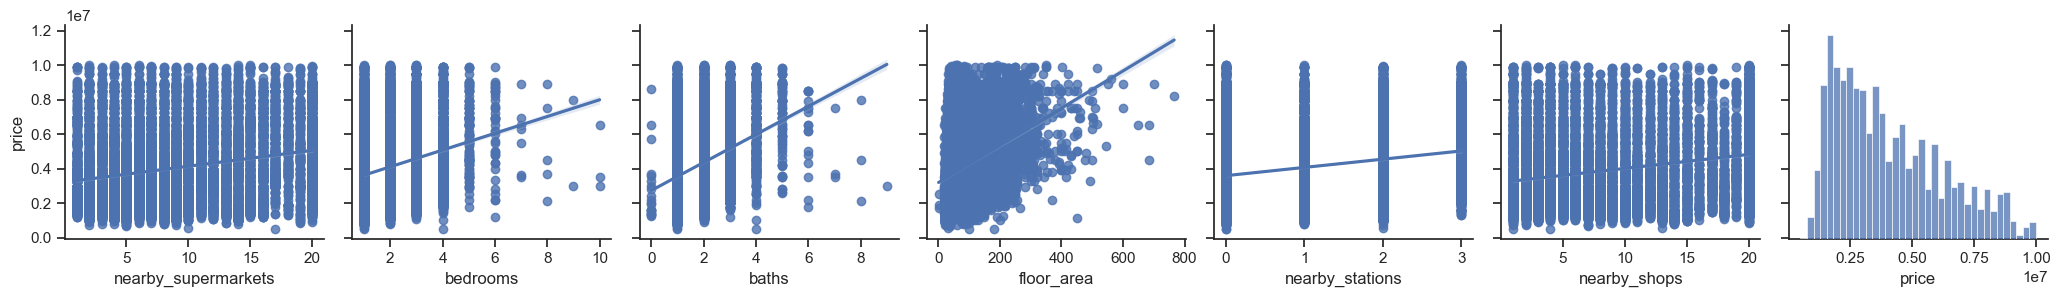

In [50]:
# Select the numeric features and the target variable 'price'
numeric_features = [ 'nearby_supermarkets', 'bedrooms', 'baths',
                    'floor_area', 'nearby_stations', 'nearby_shops', 'price']


# Create pair plots (scatter plots with regression lines) for the numeric features against 'price'
sns.set(style="ticks")
sns.pairplot(train_df[numeric_features], y_vars='price', kind='reg', height=3)
plt.show()

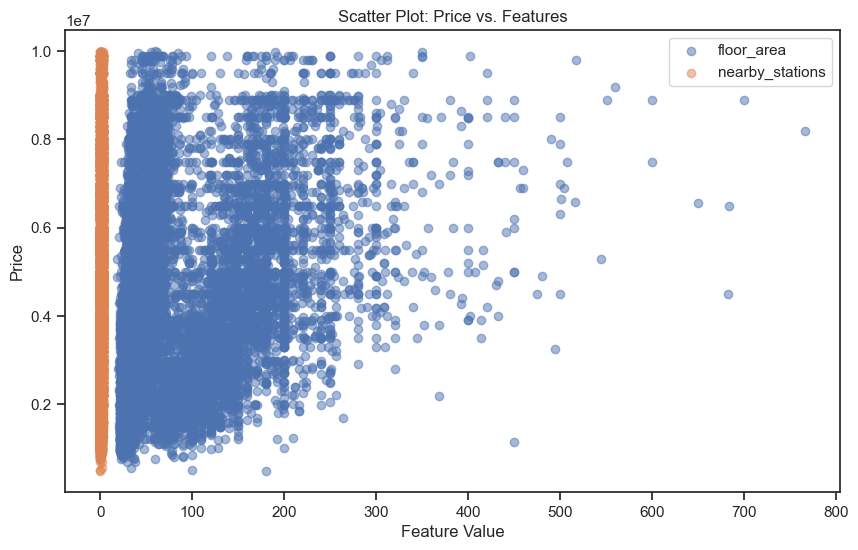

Correlation between floor_area and price: 0.34543932339052447
Correlation between nearby_stations and price: 0.23795897191014506


In [51]:
# Select the relevant columns
subset_df = train_df

# Investigate the relationship between 'floor_area' and 'nearby_stations' with 'price' (assuming 'price' is your target variable)
# You may replace 'price' with the actual target variable if it's different
subset_df['price'] = train_df['price']

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(10, 6))
plt.scatter(subset_df['floor_area'], subset_df['price'], alpha=0.5, label='floor_area')
plt.scatter(subset_df['nearby_stations'], subset_df['price'], alpha=0.5, label='nearby_stations')
plt.xlabel('Feature Value')
plt.ylabel('Price')
plt.title('Scatter Plot: Price vs. Features')
plt.legend()
plt.show()

# Calculate the correlation between 'floor_area' and 'price'
floor_area_price_corr = subset_df['floor_area'].corr(subset_df['price'])

# Calculate the correlation between 'nearby_stations' and 'price'
stations_price_corr = subset_df['nearby_stations'].corr(subset_df['price'])

print(f'Correlation between floor_area and price: {floor_area_price_corr}')
print(f'Correlation between nearby_stations and price: {stations_price_corr}')

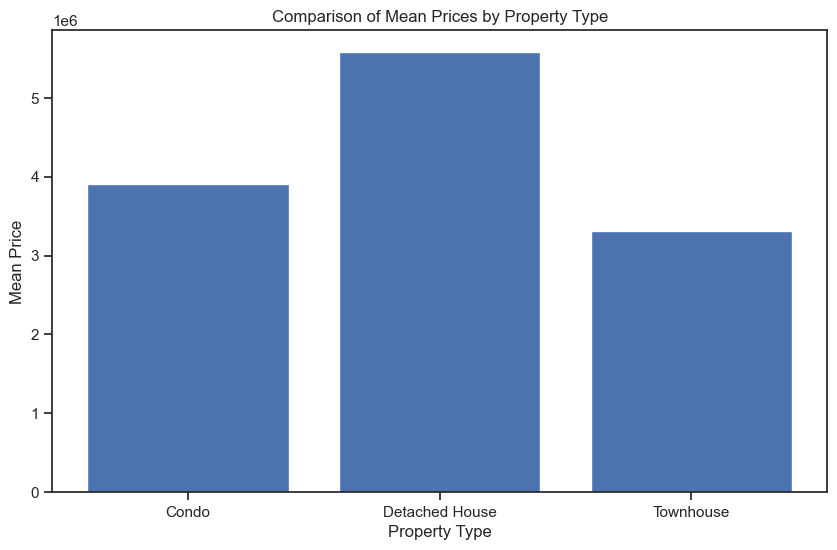

In [52]:

# Assuming you have a DataFrame called train_df
selected_columns = ['property_type', 'district', 'province', 'subdistrict', 'latitude', 'longitude',
                    'nearby_supermarkets', 'bedrooms', 'baths', 'district', 'floor_area', 'nearby_stations', 'nearby_shops', 'year_built', 'price']

# Select the relevant columns
subset_df = train_df[selected_columns]

# Filter data for each property type
condo_data = subset_df[subset_df['property_type'] == 'Condo']
detached_house_data = subset_df[subset_df['property_type'] == 'Detached House']
townhouse_data = subset_df[subset_df['property_type'] == 'Townhouse']

# Calculate the mean prices for each property type
condo_mean_price = condo_data['price'].mean()
detached_house_mean_price = detached_house_data['price'].mean()
townhouse_mean_price = townhouse_data['price'].mean()

# Create a bar chart to compare mean prices
property_types = ['Condo', 'Detached House', 'Townhouse']
mean_prices = [condo_mean_price, detached_house_mean_price, townhouse_mean_price]

plt.figure(figsize=(10, 6))
plt.bar(property_types, mean_prices)
plt.xlabel('Property Type')
plt.ylabel('Mean Price')
plt.title('Comparison of Mean Prices by Property Type')
plt.show()

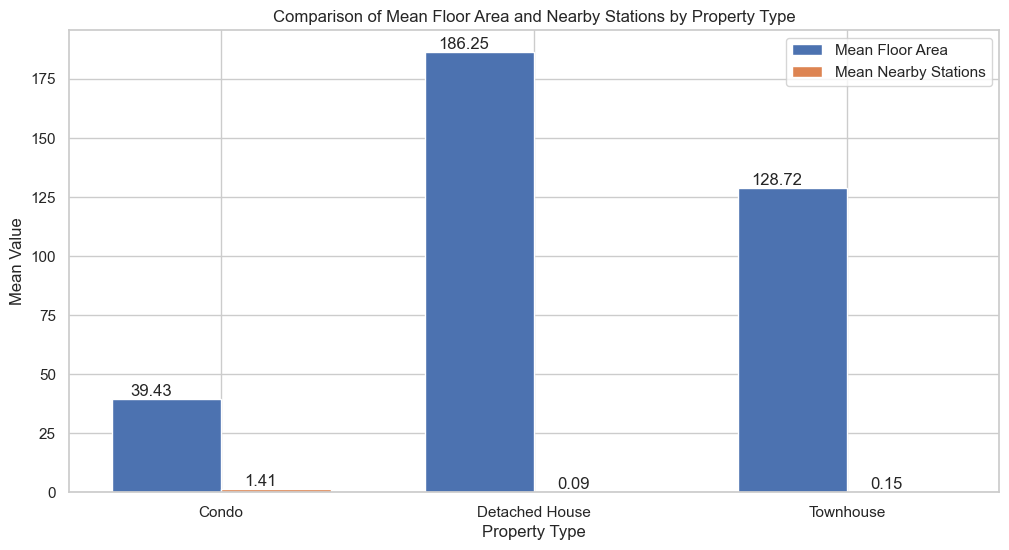

In [53]:
# Assuming you have a DataFrame called train_df
selected_columns = ['property_type', 'district', 'province', 'subdistrict', 'latitude', 'longitude',
                    'nearby_supermarkets', 'bedrooms', 'baths', 'district', 'floor_area', 'nearby_stations', 'nearby_shops', 'year_built', 'price']

# Select the relevant columns
subset_df = train_df[selected_columns]

# Group the data by 'property_type'
grouped = subset_df.groupby('property_type')

# Create a bar chart to compare the impact of 'floor_area' and 'nearby_stations' on price by property type
property_types = []
mean_floor_area_values = []
mean_nearby_stations_values = []

for name, group_data in grouped:
    property_types.append(name)
    mean_floor_area_values.append(group_data['floor_area'].mean())
    mean_nearby_stations_values.append(group_data['nearby_stations'].mean())

# Create a bar chart with values displayed on top of the bars
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")

bar_width = 0.35
index = range(len(property_types))

bars1 = plt.bar(index, mean_floor_area_values, bar_width, label='Mean Floor Area')
bars2 = plt.bar([i + bar_width for i in index], mean_nearby_stations_values, bar_width, label='Mean Nearby Stations')

plt.xlabel('Property Type')
plt.ylabel('Mean Value')
plt.title('Comparison of Mean Floor Area and Nearby Stations by Property Type')
plt.xticks([i + bar_width / 2 for i in index], property_types)
plt.legend()

# Add values on top of the bars
for bar1, bar2 in zip(bars1, bars2):
    plt.text(bar1.get_x() + bar1.get_width() / 2 - 0.05, bar1.get_height(), f'{bar1.get_height():.2f}', ha='center', va='bottom')
    plt.text(bar2.get_x() + bar2.get_width() / 2 - 0.05, bar2.get_height(), f'{bar2.get_height():.2f}', ha='center', va='bottom')

plt.show()

In [54]:
selected_columns = ['property_type', 'district']

# Select the relevant columns
subset_df = train_df[selected_columns]

# Group the data by 'district' and find the most popular property type in each district
most_popular_property_types = subset_df.groupby('district')['property_type'].agg(lambda x: x.value_counts().index[0])

# Reset the index to make it a DataFrame
most_popular_property_types = most_popular_property_types.reset_index()

# Rename the columns for clarity
most_popular_property_types.columns = ['district', 'most_popular_property_type']

# Display the result
print(most_popular_property_types)

               district most_popular_property_type
0               Bang Bo                  Townhouse
1              Bang Bon                  Townhouse
2        Bang Bua Thong                  Townhouse
3             Bang Kapi                      Condo
4             Bang Khae                      Condo
5             Bang Khen                      Condo
6         Bang Kho Laem                      Condo
7       Bang Khun Thian             Detached House
8            Bang Kruai                  Townhouse
9               Bang Na                      Condo
10           Bang Phlat                      Condo
11            Bang Phli             Detached House
12             Bang Rak                      Condo
13       Bang Sao Thong             Detached House
14             Bang Sue                      Condo
15             Bang Yai                  Townhouse
16          Bangkok Noi                      Condo
17          Bangkok Yai                      Condo
18            Bueng Kum        

In [ ]:

# Assuming you have a DataFrame called train_df
selected_columns = ['district', 'price']

# Select the relevant columns
subset_df = train_df[selected_columns]

# Group the data by 'district' and calculate the mean price in each district
mean_prices_by_district = subset_df.groupby('district')['price'].mean().reset_index()
mean_prices_by_district.columns = ['District', 'Mean Price']

# Sort the districts by mean price in descending order
mean_prices_by_district = mean_prices_by_district.sort_values(by='Mean Price', ascending=False)

# Display the table of districts with higher mean prices
print(mean_prices_by_district)